In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [15]:
# Specify the file path and sheet name
file_path = "Gathering Data grey.xlsx"  # Replace with your actual file path
sheet_name = "Sheet2"  # Replace with the sheet name containing your data

# Read the Excel sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name)
data = data.iloc[:, 3:]
matrix = data.values
# Check if data is read successfully
# Calculate standard deviations for each column
stds = data.std()

In [5]:
# Exclude cells equal to 0 in the 4th column for calculations
col_index = 3  # Indexing starts at 0, so column 4 is index 3
filtered_col4 = data.iloc[:, col_index][data.iloc[:, col_index] != 0]
stds.iloc[col_index] = filtered_col4.std()

# Create a DataFrame for plotting
stats = pd.DataFrame({ 'Standard Deviation': stds})

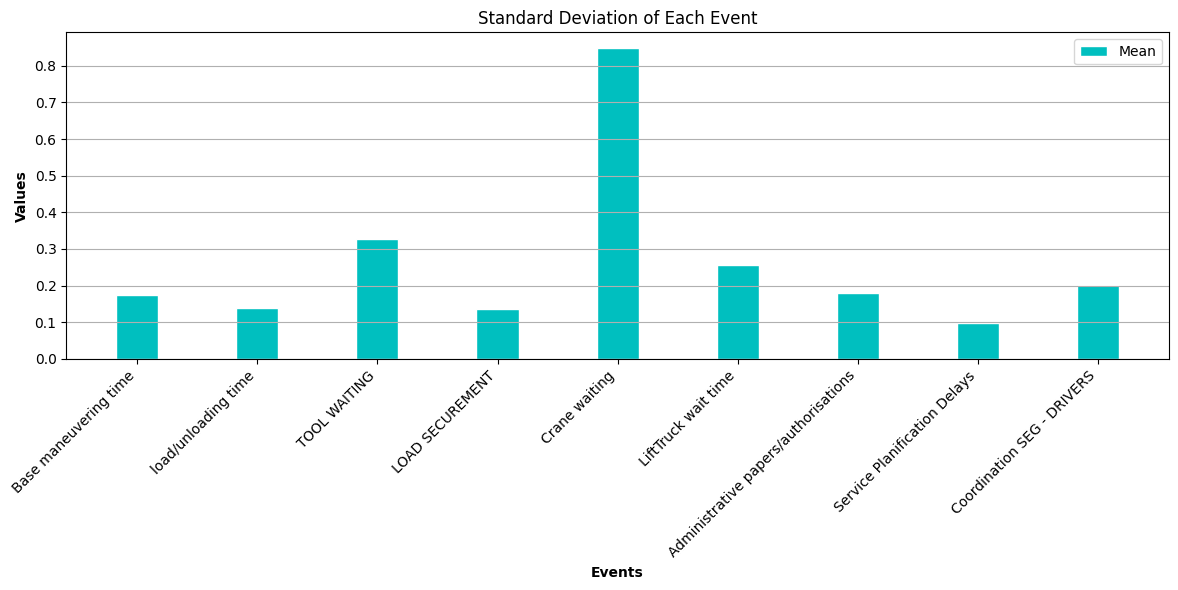

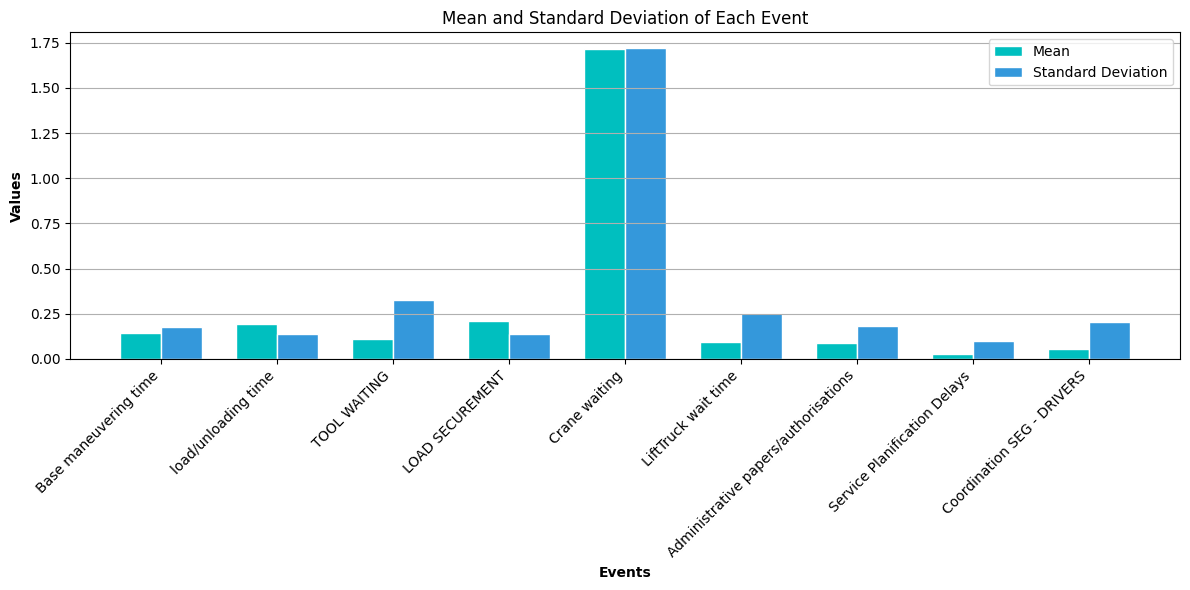

In [6]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Define the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(stats))

# Create the bars
ax.bar(r1, stats['Standard Deviation'], color='c', width=bar_width, edgecolor='white', label='Mean')

# Add labels
ax.set_xlabel('Events', fontweight='bold')
ax.set_ylabel('Values', fontweight='bold')
ax.set_title('Standard Deviation of Each Event')
ax.set_xticks([r  for r in range(len(stats))])
ax.set_xticklabels(stats.index, rotation=45, ha='right')

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()
#
# Exclude cells equal to 0 in the 4th column for calculations
col_index = 4  
filtered_col4 = data.iloc[:, col_index][data.iloc[:, col_index] != 0]

# Calculate mean and standard deviation for each column
means = data.mean()
stds = data.std()

# Replace mean and std for the 4th column with filtered values
means.iloc[col_index] = filtered_col4.mean()
stds.iloc[col_index] = filtered_col4.std()


# Create a DataFrame for plotting
stats = pd.DataFrame({'Mean': means, 'Standard Deviation': stds})

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Define the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(stats))
r2 = [x + bar_width for x in r1]

# Create the bars
ax.bar(r1, stats['Mean'], color='c', width=bar_width, edgecolor='white', label='Mean')
ax.bar(r2, stats['Standard Deviation'], color='#3498db', width=bar_width, edgecolor='white', label='Standard Deviation')

# Add labels
ax.set_xlabel('Events', fontweight='bold')
ax.set_ylabel('Values', fontweight='bold')
ax.set_title('Mean and Standard Deviation of Each Event')
ax.set_xticks([r + bar_width/2 for r in range(len(stats))])
ax.set_xticklabels(stats.index, rotation=45, ha='right')

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()

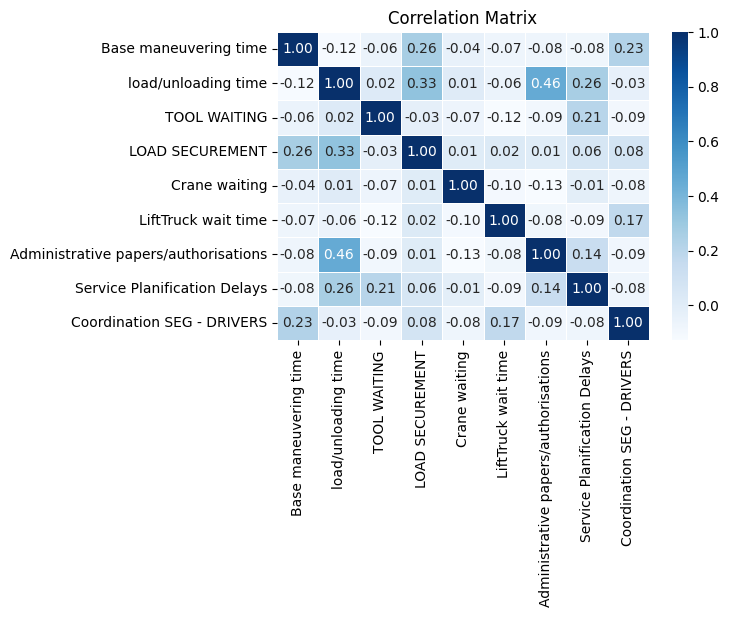

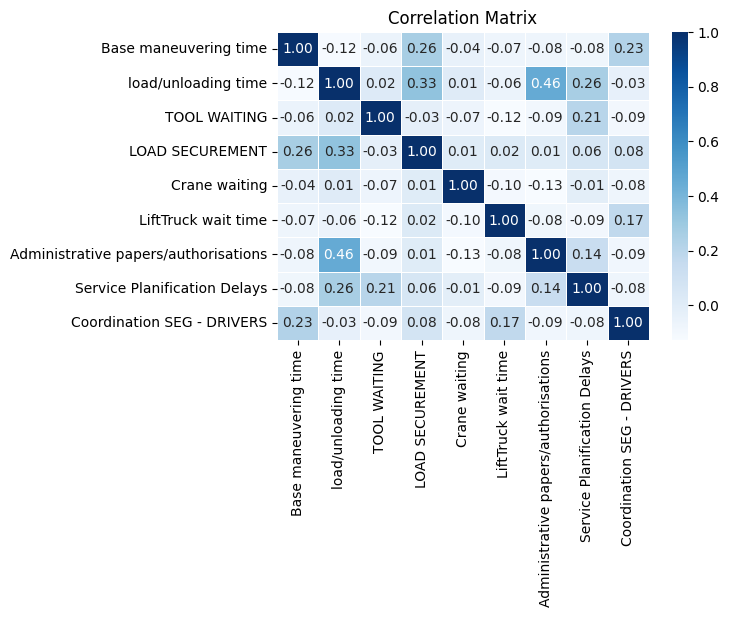

In [7]:
correlation_matrix = data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(6, 4))
sn.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(6, 4))
sn.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [8]:
def calculate_entropy(matrix):
    # Normaliser les données
    P = matrix / matrix.sum(axis=0)
    
    # Calculer l'entropie
    E = -np.nansum(P * np.log(P + 1e-12), axis=0) / np.log(matrix.shape[0])
    
    return E

In [24]:
def calculate_weights_entropy(matrix):
    E = calculate_entropy(matrix)
    D = 1 - E
    weights = D / D.sum()
    return np.round(weights, 3),D  # Arrondir les poids à 3 chiffres après la virgule

In [25]:
def calculate_weights_critic(matrix):
    # Normaliser les données
    normalized_matrix = (matrix.max(axis=0)- matrix) / (matrix.max(axis=0) - matrix.min(axis=0))

    # Calculer la déviation standard
    std_dev = np.std(normalized_matrix, axis=0)

    # Calculer la matrice de corrélation
    correlation_matrix = np.corrcoef(normalized_matrix, rowvar=False)
    
    # Calculer l'information de chaque critère
    C = std_dev * (1 - correlation_matrix.sum(axis=0) / matrix.shape[1])
    # Calculer les poids
    weights = C / C.sum()
    
    return np.round(weights, 3),C

In [26]:
def modify_D_by_C(D, C, columns):
    """
    Modify specific columns of D by corresponding columns from C.
    
    Parameters:
    - D: numpy array, array of information values
    - C: numpy array, array of criterion values
    - columns: list of integers, indices of columns to modify in D
    
    Returns:
    - D_modified: numpy array, D with specified columns modified by C
    """
    D_modified = D.copy()  # Create a copy of D to modify
    
    # Modify specified columns of D by corresponding columns from C
    D_modified[columns] = C[columns]
    
    return D_modified

In [30]:
# Calcul des poids avec la méthode ENTROPY
entropy = calculate_weights_entropy(matrix)
weights_entropy = entropy[0]
print("Weights using Entropy method:", weights_entropy)

print("\n")
# Calcul des poids avec la méthode CRITIC
critic = calculate_weights_critic(matrix)
weights_critic=critic[0]
print("Weights using CRITIC method:", weights_critic)

print("\n")

D = entropy[1]
C = critic[1]

# Columns to modify in D based on C
columns_to_modify = [1, 3, 6]

# Modify D by C for specified columns
D_modified = modify_D_by_C(D, C, columns_to_modify)
New_weights = D_modified / D_modified.sum()
rounded_weights = np.round(New_weights, 2)
print("New weights:" ,rounded_weights)

Weights using Entropy method: [0.03  0.017 0.145 0.012 0.182 0.135 0.111 0.18  0.188]


Weights using CRITIC method: [0.105 0.117 0.103 0.088 0.12  0.112 0.151 0.09  0.114]


New weights: [0.03 0.05 0.14 0.04 0.18 0.13 0.06 0.18 0.19]
